In [1]:
import numpy as np
import pandas as pd

dfGames = pd.read_csv('TicTacToeGames20230429.csv')
dfData = pd.read_csv('TicTacToeData20230429.csv')

print(dfGames.head())
print(dfData.head())

           InstanceId                                        Description  \
0  638181543317153978  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...   
1  638181543317153979  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...   
2  638181543317153980  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...   
3  638181543317153981  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...   
4  638181543317153982  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...   

   GridSize  Status                  CreatedDate                CompletedDate  
0         3       1  2023-04-27 01:05:33.7867653  2023-04-27 01:05:34.5609516  
1         3       1  2023-04-27 01:05:34.6226476  2023-04-27 01:05:34.8671608  
2         3       2  2023-04-27 01:05:34.9241532  2023-04-27 01:05:35.0947003  
3         3       1  2023-04-27 01:05:35.1530186  2023-04-27 01:05:35.3812359  
4         3       2  2023-04-27 01:05:35.4386926  2023-04-27 01:05:35.6222954  
        Id                  CreatedDate          InstanceId  Mo

In [2]:
grpGames = pd.DataFrame(dfGames.groupby(by=['Description','Status'])['InstanceId'].count())
grpGames.reset_index(inplace=True)
grpGames.rename(columns={"InstanceId": "Count"}, inplace=True)
print(type(grpGames))
print(grpGames)
print(grpGames.index)
print(grpGames.columns)
print(grpGames.shape)
#print()
#print(grpGames["Status"])
print()
print(list(grpGames["Description"].unique()))

<class 'pandas.core.frame.DataFrame'>
                                          Description  Status  Count
0           UnitTest 1P Valid Test - ComputerPlayerV1       0      1
1           UnitTest 1P Valid Test - ComputerPlayerV1       1    589
2           UnitTest 1P Valid Test - ComputerPlayerV1       2    273
3           UnitTest 1P Valid Test - ComputerPlayerV1       3    150
4           UnitTest 1P Valid Test - ComputerPlayerV2       1     71
5           UnitTest 1P Valid Test - ComputerPlayerV2       2    698
6           UnitTest 1P Valid Test - ComputerPlayerV2       3    231
7           UnitTest 1P Valid Test - ComputerPlayerV3       1     82
8           UnitTest 1P Valid Test - ComputerPlayerV3       2    715
9           UnitTest 1P Valid Test - ComputerPlayerV3       3    203
10  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...       1    661
11  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...       2    305
12  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...       3    

In [3]:
gameSetups = []
gameSetups.append('UnitTest 1P Valid Test - ComputerPlayerV1')
gameSetups.append('UnitTest 1P Valid Test - ComputerPlayerV2')
gameSetups.append('UnitTest 1P Valid Test - ComputerPlayerV3')
gameSetups.append('UnitTest 2P Valid Test - P1: ComputerPlayerV1 P2: ComputerPlayerV1')
gameSetups.append('UnitTest 2P Valid Test - P1: ComputerPlayerV1 P2: ComputerPlayerV2')
gameSetups.append('UnitTest 2P Valid Test - P1: ComputerPlayerV2 P2: ComputerPlayerV1')
gameSetups.append('UnitTest 2P Valid Test - P1: ComputerPlayerV2 P2: ComputerPlayerV2')
gameSetups.append('UnitTest 2P Valid Test - P1: ComputerPlayerV2 P2: ComputerPlayerV3')
gameSetups.append('UnitTest 2P Valid Test - P1: ComputerPlayerV3 P2: ComputerPlayerV2')
gameSetups.append('UnitTest 2P Valid Test - P1: ComputerPlayerV3 P2: ComputerPlayerV3')
#gameSetups.append('Web Api - ComputerPlayerV3')

dfGames1 = grpGames[grpGames["Description"].apply(lambda d: d in gameSetups)]
print(dfGames1)
print()
print()

newGameSetup = []
newStatus = []
newCount = []
for i in range(len(gameSetups)):
    gameSetup = gameSetups[i]
    for status in range(1,4):
        dfResult = dfGames1[(dfGames1["Description"].str.fullmatch(gameSetup)) & (dfGames1["Status"] == status)]
        if dfResult.shape[0] == 0:
            print(f"{gameSetup}:{status}:{0}")
            newGameSetup.append(gameSetup)
            newStatus.append(status)
            newCount.append(0)

#print(newGameSetup)
#print(newStatus)
#print(newCount)

newRows = pd.DataFrame(data={"Description": newGameSetup, "Status": newStatus, "Count": newCount}, index=range(len(newGameSetup)))
#print(newRows)
dfGames1 = pd.concat([dfGames1, newRows])
dfGames1.sort_values(by=["Description","Status"], inplace=True)
dfGames1.reset_index(drop=True,inplace=True)
print(dfGames1)

                                          Description  Status  Count
0           UnitTest 1P Valid Test - ComputerPlayerV1       0      1
1           UnitTest 1P Valid Test - ComputerPlayerV1       1    589
2           UnitTest 1P Valid Test - ComputerPlayerV1       2    273
3           UnitTest 1P Valid Test - ComputerPlayerV1       3    150
4           UnitTest 1P Valid Test - ComputerPlayerV2       1     71
5           UnitTest 1P Valid Test - ComputerPlayerV2       2    698
6           UnitTest 1P Valid Test - ComputerPlayerV2       3    231
7           UnitTest 1P Valid Test - ComputerPlayerV3       1     82
8           UnitTest 1P Valid Test - ComputerPlayerV3       2    715
9           UnitTest 1P Valid Test - ComputerPlayerV3       3    203
10  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...       1    661
11  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...       2    305
12  UnitTest 2P Valid Test - P1: ComputerPlayerV1 ...       3    134
13  UnitTest 2P Valid Test - P1: C

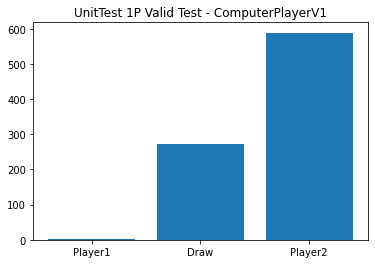

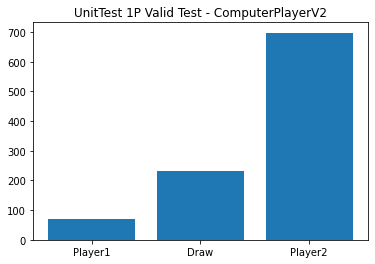

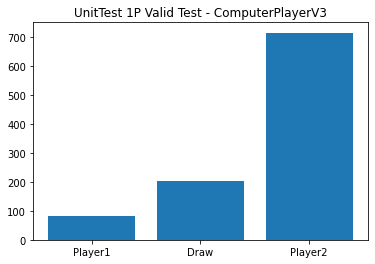

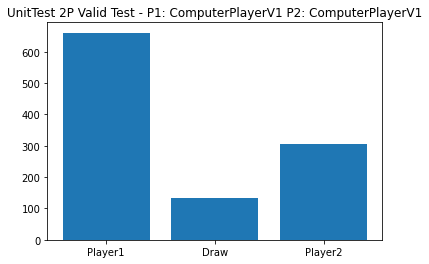

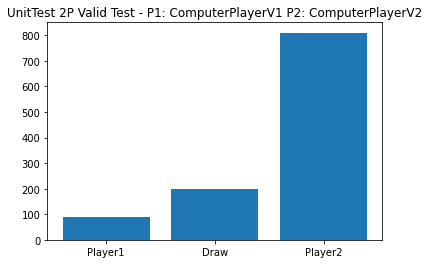

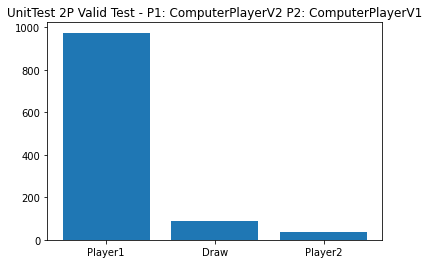

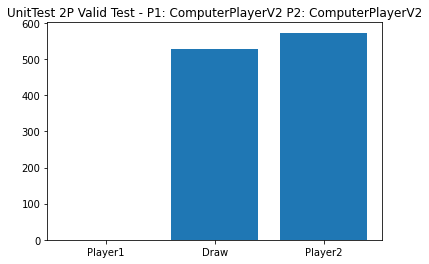

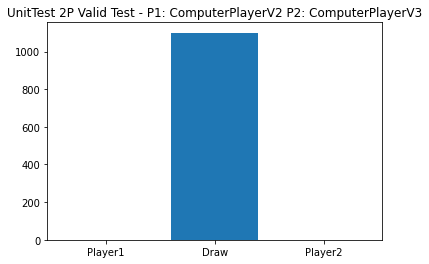

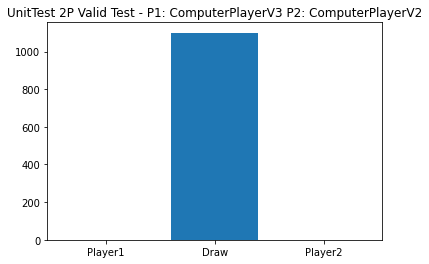

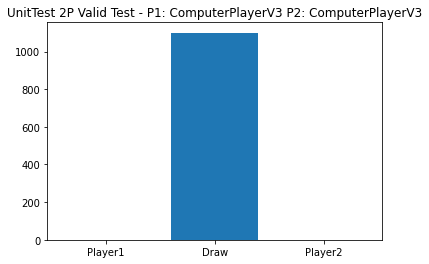

In [4]:
import matplotlib.pyplot as plt

xpos = [1,2,3]
for i in range(len(gameSetups)):
    gameSetup = gameSetups[i]
    dfColumnChart = dfGames1[dfGames1["Description"].str.fullmatch(gameSetup)]
    #print(dfColumnChart)
    count = dfColumnChart["Count"].values
    countList = [count[0],count[2],count[1]]
    plt.bar(x=xpos,height=countList)
    plt.xticks(ticks=xpos,labels=["Player1","Draw","Player2"])
    plt.title(gameSetup)
    #plt.savefig('TicTacToeGameOutcomeByGameSetup' + gameSetup.replace(' ','_').replace('UnitTest_','') + '.png')
    #plt.close()
    plt.show()


In [5]:
def SumPlayerMoves(dfPlayerWinDataMaxMoves, dfPlayerWinData):

    emptyCells = [0 for i in range(9)]
    p1Cells = [0 for i in range(9)]
    p2Cells = [0 for i in range(9)]
    
    for i in range(dfPlayerWinDataMaxMoves.shape[0]):
        row = dfPlayerWinDataMaxMoves.iloc[i]
        InstanceId = row["InstanceId"]
        MoveNumber = row["MoveNumber"]
        latestMove = dfPlayerWinData[(dfPlayerWinData["InstanceId"].apply(lambda id: id == InstanceId)) & (dfPlayerWinData["MoveNumber"].apply(lambda m: m == MoveNumber))]
        #print(latestMove)
        for c in range(latestMove.shape[0]):
            move = latestMove.iloc[c]
            ci = move["CellIndex"]
            cc = move["CellContent"]
            if cc==0:
                emptyCells[ci] += 1
            elif cc==1:
                p1Cells[ci] += 1
            elif cc==2:
                p2Cells[ci] += 1
    return (p1Cells, p2Cells, emptyCells)

dfWinGames = dfGames[dfGames["Description"].isin(gameSetups)]

dfP1WinGames = dfWinGames[dfWinGames["Status"] == 1]
gamesP1Won = dfP1WinGames["InstanceId"].unique().tolist()
dfP1WinData = dfData[dfData["InstanceId"].isin(gamesP1Won)]
dfP1WinDataMaxMoves = dfP1WinData.groupby(by="InstanceId").max()
dfP1WinDataMaxMoves.reset_index(inplace=True)

p1Results = SumPlayerMoves(dfP1WinDataMaxMoves, dfP1WinData)
print(p1Results)


([1609, 1454, 1533, 754, 1102, 656, 961, 695, 837], [658, 726, 714, 897, 705, 919, 756, 902, 857], [200, 287, 220, 816, 660, 892, 750, 870, 773])


In [6]:
player1Moves = np.array(p1Results[0])
totalPlayer1Moves = player1Moves.sum()
print(totalPlayer1Moves)
player1MovesPercentages = (player1Moves * 100)/totalPlayer1Moves
print(player1MovesPercentages)

9601
[16.75867097 15.14425581 15.96708676  7.85334861 11.47797104  6.8326216
 10.00937402  7.23882929  8.71784189]


In [7]:
dfP2WinGames = dfWinGames[dfWinGames["Status"] == 2]
gamesP2Won = dfP2WinGames["InstanceId"].unique().tolist()
dfP2WinData = dfData[dfData["InstanceId"].isin(gamesP2Won)]
dfP2WinDataMaxMoves = dfP2WinData.groupby(by="InstanceId").max()
dfP2WinDataMaxMoves.reset_index(inplace=True)

p2Results = SumPlayerMoves(dfP2WinDataMaxMoves, dfP2WinData)
print(p2Results)


([617, 1396, 1478, 1303, 993, 1966, 1714, 1396, 1229], [2601, 1566, 1538, 1226, 1815, 422, 925, 588, 1411], [192, 448, 394, 881, 602, 1022, 771, 1426, 770])


In [8]:
player2Moves = np.array(p2Results[0])
totalPlayer2Moves = player2Moves.sum()
print(totalPlayer2Moves)
player2MovesPercentages = (player2Moves * 100)/totalPlayer2Moves
print(player2MovesPercentages)

12092
[ 5.10254714 11.54482302 12.22295733 10.77571948  8.21204102 16.25868343
 14.17466093 11.54482302 10.16374462]


In [43]:
def annotatedHeatMap(data1d, title):
    
    data2d = []
    for i in range(3):
        r = i*3
        data2d.append(data1d[r:r+3])
        
    fig, ax = plt.subplots()
    
    # Plot the heatmap
    im = ax.imshow(data2d,cmap="copper")
    
    xticks = [i-1 for i in range(1,4)]
    yticks = [i-1 for i in range(1,4)]
    xlabels = [i for i in range(1,4)]
    ylabels = [i for i in range(1,4)]
    ax.set_xticks(xticks, labels=xlabels, fontsize="14")
    ax.set_yticks(yticks, labels=ylabels, fontsize="14")
    ax.set_ylabel("Row", fontsize="14")
    ax.set_xlabel("Column", fontsize="14")
    ax.set_title(title, fontsize="20")
    
    # Loop over data dimensions and create text annotations.
    for r in range(3):
        for c in range(3):
            text = ax.text(r, c, round((data2d[r][c]),2), ha="center", va="center", color="w", fontsize="x-large", fontweight="bold")
    
    plt.savefig(title.replace(' ', '_').replace(':','') + '.png')
    plt.close()
    
annotatedHeatMap(player1MovesPercentages, "P1 Wins: Cells occupancy by percentage")
annotatedHeatMap(player2MovesPercentages, "P2 Wins: Cells occupancy by percentage")